In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

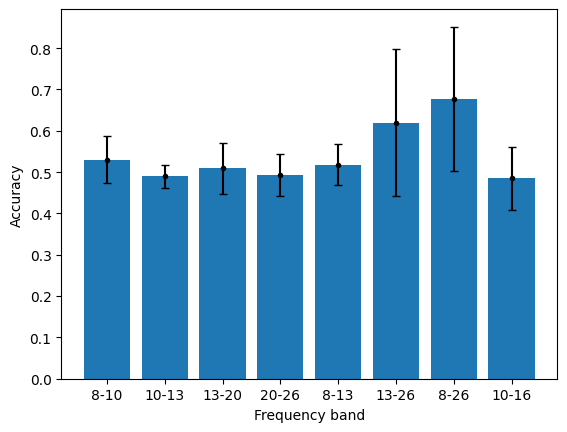

In [2]:
freq_bands = [[8, 10], [10, 13], [13, 20], [20, 26], [8, 13], [13, 26], [8, 26], [10, 16]]

with open('reports/report_acc_svm.json', 'r') as f:
    report = json.load(f)

result_by_freq_band = {}
for k, v in report.items():
    for key in v:
        try:
            key = int(key)
            if key in result_by_freq_band:
                result_by_freq_band[key]['vals'].append(v[str(key)])
            else:
                result_by_freq_band[key] = {'vals': [v[str(key)]]}
        except Exception as e:
            continue

for k, v in result_by_freq_band.items():
    result_by_freq_band[k]['mean'] = np.mean([x['mean'] for x in v['vals']])
    result_by_freq_band[k]['std'] = np.std([x['mean'] for x in v['vals']])

plt.bar(list(result_by_freq_band.keys()), [x['mean'] for x in result_by_freq_band.values()])
plt.errorbar(list(result_by_freq_band.keys()), [x['mean'] for x in result_by_freq_band.values()], [x['std'] for x in result_by_freq_band.values()], color='black', fmt='.', capsize=3)
plt.xticks(list(result_by_freq_band.keys()), labels=[f'{freq_bands[x][0]}-{freq_bands[x][1]}' for x in result_by_freq_band.keys()])
plt.xlabel('Frequency band')
plt.ylabel('Accuracy')
plt.show()

In [3]:
results_by_model = {}
results_by_model['Yao et al.'] = {}
with open('reports/report_acc_svm.json', 'r') as f:
    report = json.load(f)
for k, v in report.items():
    # best_id = 0
    # for i in range(len(freq_bands)):
    #     if freq_bands[i][0] == v['best_freq'][0] and freq_bands[i][1] == v['best_freq'][1]:
    #         best_id = i
    #         break
    # best_id = str(best_id)
    best_id = '6'
    results_by_model['Yao et al.'][k] = {'acc': v[best_id]['mean'], 'std': v[best_id]['std']}

with open('reports/report_acc_erds_svm_rbf.json', 'r') as f:
    report = json.load(f)
results_by_model['ERD/ERS, individual peaks'] = {}
for k, v in report.items():
    results_by_model['ERD/ERS, individual peaks'][k] = {'acc': v['mean'], 'std': v['std']}

with open('reports/report_acc_erds_csp_svm_rbf_filtered.json', 'r') as f:
    report = json.load(f)
results_by_model['CSP, individual peaks'] = {}
for k, v in report.items():
    results_by_model['CSP, individual peaks'][k] = {'acc': v['mean'], 'std': v['std']}

with open('reports/report_vasilyev_gaussian.json', 'r') as f:
    report = json.load(f)
results_by_model['Vasilyev et al.'] = {}
for k, v in report.items():
    results_by_model['Vasilyev et al.'][k] = {'acc': v['mean'], 'std': v['std']}

with open('reports/report_acc_erds_csp_svm_rbf_ts_filtered.json', 'r') as f:
    report = json.load(f)
results_by_model['CSP, individual peaks, + TS'] = {}
for k, v in report.items():
    results_by_model['CSP, individual peaks, + TS'][k] = {'acc': v['mean'], 'std': v['std']}

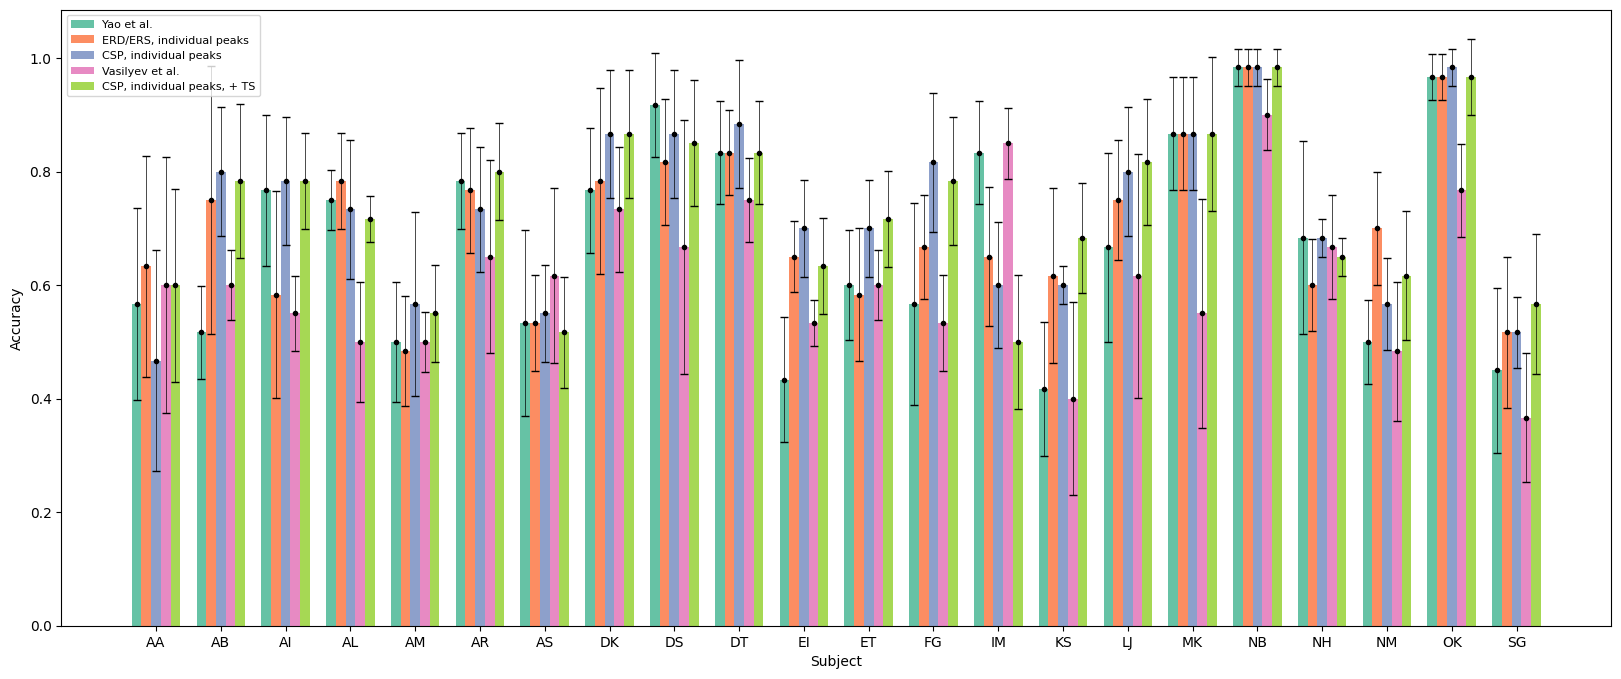

In [4]:
plt.figure(figsize=(20, 8))

mlt = -2
width = 0.15

paired_colors = plt.cm.Set2.colors

for i, (k, v) in enumerate(results_by_model.items()):
    x = np.array([i for i in range(len(results_by_model[k].keys()))])
    offset = (width) * mlt
    color = paired_colors[i % len(paired_colors)]
    plt.bar(x + offset, [x['acc'] for x in results_by_model[k].values()], width=width, label=k, color=color)
    plt.errorbar(x + offset, [x['acc'] for x in results_by_model[k].values()], [x['std'] for x in results_by_model[k].values()], color='black', fmt='.', capsize=3, elinewidth=0.5)
    plt.xticks(x, labels=list(results_by_model[k].keys()))
    mlt += 1

plt.xlabel('Subject')
plt.ylabel('Accuracy')
plt.legend(loc=2, prop={'size': 8})
plt.show()

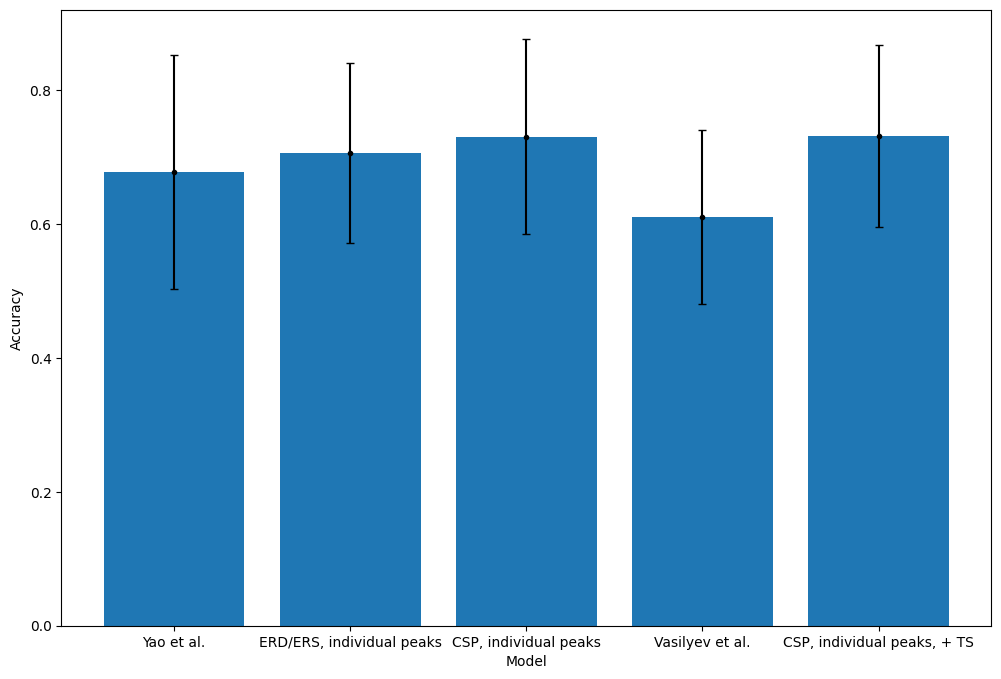

In [5]:
plt.figure(figsize=(12, 8))
models = []
results = []
stds = []

for k, v in results_by_model.items():
    models.append(k)
    results.append(np.mean([x['acc'] for x in results_by_model[k].values()]))
    stds.append(np.std([x['acc'] for x in results_by_model[k].values()]))

plt.bar(models, results)
plt.errorbar(models, results, stds, color='black', fmt='.', capsize=3)
plt.xticks(models, labels=list(models))

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [6]:
from scipy.stats import false_discovery_control

false_discovery_control([0.0005927619658566589, 0.24818501184356523, 0.028867291384544618, 0.26234781875119384, 0.03483983087906258, 0.021609638133058058, 0.5134021039282408])

array([0.00414933, 0.30607246, 0.0609697 , 0.30607246, 0.0609697 ,
       0.0609697 , 0.5134021 ])

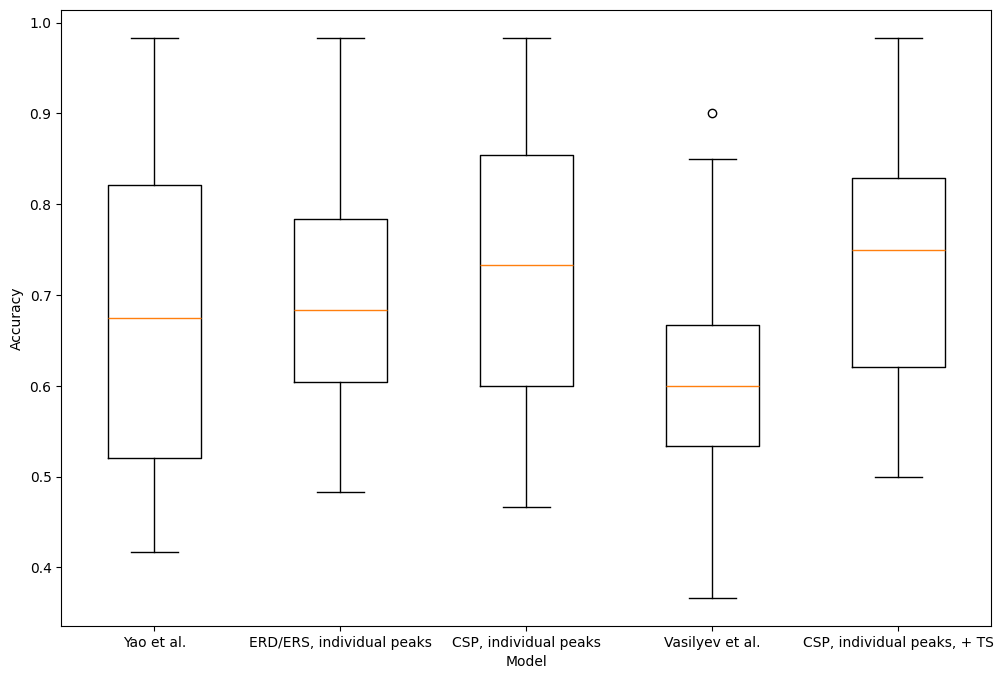

In [8]:
plt.figure(figsize=(12, 8))
models = []
results = []
stds = []

for k, v in results_by_model.items():
    models.append(k)
    results.append([x['acc'] for x in results_by_model[k].values()])

plt.boxplot(results, tick_labels=models)
# plt.xticks(models, labels=list(models))

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()